# ENTRENAMIENTO

## ALGORITMO DE ENTRENAMIENTO DE LA NEURONA

In [1]:
import numpy as np
import os
import errno
import math
import pylab as plt
import pandas as pd

class Neurona:

    #CONSTRUCTOR
    def __init__(self, MATRIZ_ENTRADA = [[1,0,1], [0,1,1], [1,1,0]], MATRIZ_SALIDA = [[1,0], [0,1], [1,1]], MATRIZ_PESOS = [[0.1,-0.5,-0.9], [0.6,0.2,-0.3]], MATRIZ_UMBRALES = [0.5, -0.8], RATA_APRENDIZAJE = 1, ERROR_MAXIMO = 0.1, NUMERO_ITERACIONES = 0, FUNCION_SALIDA = 1):
        #MATRICES
        self.MATRIZ_ENTRADA = MATRIZ_ENTRADA
        self.MATRIZ_SALIDA = MATRIZ_SALIDA
        self.MATRIZ_PESOS = MATRIZ_PESOS
        self.MATRIZ_UMBRALES = MATRIZ_UMBRALES
        #VARIABLES DE CONFIGURACION
        self.RATA_APRENDIZAJE = RATA_APRENDIZAJE
        self.ERROR_MAXIMO = ERROR_MAXIMO
        self.NUMERO_ITERACIONES = NUMERO_ITERACIONES
        self.FUNCION_SALIDA = FUNCION_SALIDA

    #METODO PARA ENTRENAR LA NEURONA
    def ENTRENAR(self, ARC_PESOS, ARC_UMBRALES, CARPETA):

        print("---------------------------")
        print("---------------------------")

        print()
        print("---CONFIGURACION---")
        print()

        print('MATRIZ DE DATOS')
        MATRIZ = []
        for I in range(len(self.MATRIZ_ENTRADA)):
            FILA = []
            for J in range(self.MATRIZ_ENTRADA.ndim):
                FILA.append(self.MATRIZ_ENTRADA[I,J])

            for J in range(self.MATRIZ_SALIDA.ndim):
                FILA.append(self.MATRIZ_SALIDA[I] if self.MATRIZ_SALIDA.ndim==1 else (self.MATRIZ_SALIDA[I,J]))

            MATRIZ.append(FILA)

        COL = []
        for J in range(self.MATRIZ_ENTRADA.ndim):
            COL.append("X"+str(J))

        for J in range(self.MATRIZ_SALIDA.ndim):
            COL.append("Y"+str(J))

        df2 = pd.DataFrame(MATRIZ, columns=COL)
        display(df2)

        print()
        print('PESOS INICIALES')
        display(pd.DataFrame(self.MATRIZ_PESOS))

        print()
        print('UMBRALES INICIALES')
        display(pd.DataFrame(self.MATRIZ_UMBRALES))

        print()
        print('RATA DE APREMDIZAJE', self.RATA_APRENDIZAJE)
        print('ERROR_MAXIMO PERMITIDO', self.ERROR_MAXIMO)
        print('NUMERO DE ITERACIONES', self.NUMERO_ITERACIONES)
        print('FUNCION DE SALIDA', self.NOMBRE_SALIDAS())

        print("---------------------------")
        print("---------------------------")

        print()
        print("---ENTRENAMIENTO---")
        print()

        plt.xlabel('ITERACION')
        plt.ylabel('ERROR RMS')
        plt.title('ERRORES DE LAS ITERACIONES')
        plt.grid()

        #CICLO PARA ITERACIONES
        ITERACION_INICIAL = 0
        while True:

            ERROR_PATRON = []

            #CICLO ENCARGADO DE PRESENTAR LOS PATRONES
            for I in range(len(self.MATRIZ_ENTRADA)):

                PATRON_PRESENTADO = (self.MATRIZ_ENTRADA[I,:])
                SALIDA_PATRON = np.array([self.MATRIZ_SALIDA[I]]) if self.MATRIZ_SALIDA.ndim==1 else (self.MATRIZ_SALIDA[I,:])
                
                ERROR_PATRON.append((np.abs(self.FUNCION_ERROR_LINEAL(SALIDA_PATRON, self.FUNCION_SALIDAS(self.FUNCION_SOMA(PATRON_PRESENTADO)))).sum()) / self.MATRIZ_SALIDA.ndim)

                self.ACTUALIZAR_PESOS(PATRON_PRESENTADO, self.FUNCION_ERROR_LINEAL(SALIDA_PATRON, self.FUNCION_SALIDAS(self.FUNCION_SOMA(PATRON_PRESENTADO))))
                self.ACTUALIZAR_UMBRALES(self.FUNCION_ERROR_LINEAL(SALIDA_PATRON, self.FUNCION_SALIDAS(self.FUNCION_SOMA(PATRON_PRESENTADO))))

            #METODO PARA OBTENER EL ERROR DE LA ITERACION
            ERROR_RMS = (np.sum(ERROR_PATRON)) / len(self.MATRIZ_ENTRADA)
            
            plt.plot(ITERACION_INICIAL+1, ERROR_RMS, 'o', linewidth=3, color=(0.2,0.1,0.4))
            
            ITERACION_INICIAL+=1

            #CONDICIONES DE PARADA
            if((ITERACION_INICIAL > self.NUMERO_ITERACIONES-1) or (ERROR_RMS <= self.ERROR_MAXIMO)):
                break
        
        if(ERROR_RMS <= self.ERROR_MAXIMO):

            self.GUADAR_PESOS_UMBRALES(CARPETA, ARC_PESOS, ARC_UMBRALES)

            print('PESOS OPTIMOS')
            PESOS_OBTENIDOS = pd.DataFrame(self.MATRIZ_PESOS)
            display(PESOS_OBTENIDOS)

            print()
            print('UMBRALES OBTENIDOS')
            UMBRALES_OBTENIDOS = pd.DataFrame(self.MATRIZ_UMBRALES)
            display(UMBRALES_OBTENIDOS)
            print()

        plt.show()

        print("ERROR RMS: ", ERROR_RMS)
        print("NUMERO DE ITERACIONES REALIZADAS: ", ITERACION_INICIAL)
        print()

    #METODO PARA OBTENER LA FUNCION SOMA
    def FUNCION_SOMA(self, PATRON):
        SL = []         #SALIDA DE LA FUNCION SOMA
        for N in range(len(self.MATRIZ_PESOS)):
            SLD = 0     #SUMATORIA DE LA FUNCION SOMA
            for M in range(len(self.MATRIZ_PESOS[0])):
                SLD += (PATRON[M] * self.MATRIZ_PESOS[N][M])
            SL.append(SLD - self.MATRIZ_UMBRALES[N])
        return SL

    #METODO PARA OBTENER EL ERROR LINEAL
    def FUNCION_ERROR_LINEAL(self, SALIDA_PATRON, ESCALON):
        EL = []          #ERROR LINEAL
        for N in range(len(ESCALON)):
            EL.append(SALIDA_PATRON[N] - ESCALON[N])
        return EL
    
    #METODO PARA ACTUALIZAR PESOS
    def ACTUALIZAR_PESOS(self, PATRON_PRESENTADO, ERROR_LINEAL):
        for N in range(len(self.MATRIZ_PESOS)):
            for M in range(len(self.MATRIZ_PESOS[0])):
                self.MATRIZ_PESOS[N][M] += (self.RATA_APRENDIZAJE * ERROR_LINEAL[N] * PATRON_PRESENTADO[M])

    #METODO PARA ACTUALIZAR UMBRALES
    def ACTUALIZAR_UMBRALES(self, ERROR_LINEAL):
        for N in range(len(self.MATRIZ_UMBRALES)):
            self.MATRIZ_UMBRALES[N] += (self.RATA_APRENDIZAJE * ERROR_LINEAL[N] * 1)

    def FUNCION_SALIDAS(self, SALIDA_SOMA):
        switcher = {
            1: self.FUNCION_ESCALON(SALIDA_SOMA),
            2: self.FUNCION_LINEAL(SALIDA_SOMA),
            3: self.FUNCION_SIGMOIDE(SALIDA_SOMA)
        }
        return switcher.get(self.FUNCION_SALIDA, "ERROR")

    #METODO PARA OBTENER LA FUNCION ESCALON
    def FUNCION_ESCALON(self, SALIDA_SOMA):
        YR = []
        for N in range(len(SALIDA_SOMA)):
            YR.append(1 if SALIDA_SOMA[N]>=0 else 0)
        return YR

    #METODO PARA OBTENER LA FUNCION SIGMOIDE
    def FUNCION_SIGMOIDE(self, SALIDA_SOMA):
        YR = []
        for N in range(len(SALIDA_SOMA)):
            YR.append(1 / (1 + np.exp(-SALIDA_SOMA[N])))
        return YR

    #METODO PARA OBTENER LA FUNCION LINEAL
    def FUNCION_LINEAL(self, SALIDA_SOMA):
        YR = SALIDA_SOMA
        return YR

    #NOMBRE DE LA FUNCION SALIDA
    def NOMBRE_SALIDAS(self):
        switcher = {
            1: 'ESCALON',
            2: 'LINEAL',
            3: 'SIGMOIDE'
        }
        return switcher.get(self.FUNCION_SALIDA, "ERROR")

    #GUADAR PESOS Y UMBRALES
    def GUADAR_PESOS_UMBRALES(self, NOMBRE_ENTRENAMIENTO, ARC_PESOS, ARC_UMBRALES):
        try:
            os.mkdir('CONFIG/' + NOMBRE_ENTRENAMIENTO)
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise

        try:
            os.mkdir('CONFIG/' + NOMBRE_ENTRENAMIENTO + "/" + self.NOMBRE_SALIDAS())
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise
        
        np.savetxt("CONFIG/" + NOMBRE_ENTRENAMIENTO + "/" + self.NOMBRE_SALIDAS() + "/" + ARC_PESOS, self.MATRIZ_PESOS)
        np.savetxt("CONFIG/" + NOMBRE_ENTRENAMIENTO + "/" + self.NOMBRE_SALIDAS() + "/" + ARC_UMBRALES, self.MATRIZ_UMBRALES)

## CONFIGURACION DEL ENTRENAMIENTO

In [2]:
import random as rn
import numpy as np

class ConfigEntrenamiento:

    #CONSTRUCTOR
    def __init__(self, ARCHIVO_ENTRADA = 'ENTRADAS.TXT', ARCHIVO_SALIDA = 'SALIDAS.TXT', CARPETA = 'PRUEBA'):

        self.MATRIZ_ENTRADA = np.loadtxt('DATA/' + ARCHIVO_ENTRADA)
        self.MATRIZ_SALIDA = np.loadtxt('DATA/' + ARCHIVO_SALIDA)
        self.CARPETA = CARPETA

    #METODO PARA GENERAR PESOS
    def GENERAR_PESOS(self):
        MATRIZ = []
        for N in range(self.MATRIZ_SALIDA.ndim):
            FILA = []
            for M in range(len(self.MATRIZ_ENTRADA[0])):
                FILA.append(round(rn.uniform(-1, 1), 2))
            MATRIZ.append(FILA)
        return MATRIZ

    #METODO PARA GENERAR UMBRALES
    def GENERAR_UMBRALES(self):
        FILA = []
        for N in range(self.MATRIZ_SALIDA.ndim):
            FILA.append(round(rn.uniform(-1, 1), 2))
        return FILA

    #EJECUTAR NEURONA
    def ENTRENAR_NEURONA(self, RATA_APRENDIZAJE, ERROR_MAXIMO, NUMERO_ITERACIONES, FUNCION_SALIDA):
        neuro = Neurona(
            self.MATRIZ_ENTRADA, self.MATRIZ_SALIDA, self.GENERAR_PESOS(), self.GENERAR_UMBRALES(),
            RATA_APRENDIZAJE, ERROR_MAXIMO, NUMERO_ITERACIONES, FUNCION_SALIDA
            )
        neuro.ENTRENAR('PESOS.TXT', 'UMBRALES.TXT', self.CARPETA)

## EJECUTAR ENTRENAMIENTO

SE DEFINE LOS ARCHIVOS DE ENTRADAS Y SALIDAS DE LA NEURONA, TAMBIEN LA CONFIGURACION DE ESTA, COMO LA RATA DE APRENDIZAJE, ERROR MAXIMO Y EL NUMERO DE ITERACIONES Y LA FUNCION DE SALIDA QUE SE DESEA USAR

FUNCIONES DE SALIDA
- 1 => ESCALON
- 2 => LIENAL
- 3 => SIGMOIDE

ASEGURESE QUE LOS ARCHIVOS SEAN DEL TIPO TXT Y SE ENCUENTREN EN LA CARPETA DATA DEL PROYECTO

---------------------------
---------------------------

---CONFIGURACION---

MATRIZ DE DATOS


,X0,X1,Y0
0,0.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,1.0,1.0



PESOS INICIALES


,0,1
0,-0.09,-0.99



UMBRALES INICIALES


,0
0,-0.53



RATA DE APREMDIZAJE 1
ERROR_MAXIMO PERMITIDO 0.1
NUMERO DE ITERACIONES 500
FUNCION DE SALIDA ESCALON
---------------------------
---------------------------

---ENTRENAMIENTO---



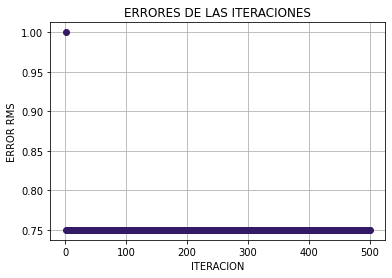

ERROR RMS:  0.75
NUMERO DE ITERACIONES REALIZADAS:  500



In [3]:
# NOMBRE DEL ARCHIVO DE ENTRADAS
ARCHIVO_ENTRADA = 'ENTRADAS.TXT'

# NOMBRE DEL ARCHIVO DE SALIDAS
ARCHIVO_SALIDA = 'SALIDAS.TXT'

# NOMBRE DEL ENTRENAMIENTO QUE DESEA REALIZAR
NOMBRE_DEL_ENTRENAMIENTO = 'COMPUERTA_AND'

# RATA DE APRENDIZAJE DEL ENTRENAMIENTO
RATA_APRENDIZAJE = 1

# ERROR MAXIMO PERMITIDO PARA EL ENTRENAMIENTO
ERROR_MAXIMO = 0.1

# NUMERO MAXIMO DE ITERACIONES QUE REALIZARA EL ENTRENAMIENTO
NUMERO_ITERACIONES = 500

# FUNCION DE SALIDA PARA EL ENTRENAMIENTO
FUNCION_SALIDA = 1

cfe = ConfigEntrenamiento(ARCHIVO_ENTRADA, ARCHIVO_SALIDA, NOMBRE_DEL_ENTRENAMIENTO)
cfe.ENTRENAR_NEURONA(RATA_APRENDIZAJE, ERROR_MAXIMO, NUMERO_ITERACIONES, FUNCION_SALIDA)

# SIMULACION

## ALGORITMO DE SIMULACION DE LA NEURONA

In [4]:
import numpy as np

class TestNeurona:

    #CONSTRUCTOR
    def __init__(self, MATRIZ_ENTRADA = [[1,0,1], [0,1,1], [1,1,0]], MATRIZ_SALIDA = [[1,0], [0,1], [1,1]], MATRIZ_PESOS = [[0.1,-0.5,-0.9], [0.6,0.2,-0.3]], MATRIZ_UMBRALES = [0.5, -0.8], FUNCION_SALIDA = 1):
        #MATRICES
        self.MATRIZ_ENTRADA = MATRIZ_ENTRADA
        self.MATRIZ_SALIDA = MATRIZ_SALIDA
        self.MATRIZ_PESOS = MATRIZ_PESOS
        self.MATRIZ_UMBRALES = MATRIZ_UMBRALES
        self.FUNCION_SALIDA = FUNCION_SALIDA

    #METODO PARA SIMULAR LA NEURONA
    def SIMULAR(self):

        print("---------------------------")
        print("---------------------------")

        print()
        print("---CONFIGURACION---")
        print()

        print('MATRIZ DE DATOS')
        MATRIZ = []
        for I in range(len(self.MATRIZ_ENTRADA)):
            FILA = []
            for J in range(self.MATRIZ_ENTRADA.ndim):
                FILA.append(self.MATRIZ_ENTRADA[I,J])

            for J in range(self.MATRIZ_SALIDA.ndim):
                FILA.append(self.MATRIZ_SALIDA[I] if self.MATRIZ_SALIDA.ndim==1 else (self.MATRIZ_SALIDA[I,J]))

            MATRIZ.append(FILA)

        COL = []
        for J in range(self.MATRIZ_ENTRADA.ndim):
            COL.append("X"+str(J))

        for J in range(self.MATRIZ_SALIDA.ndim):
            COL.append("Y"+str(J))

        df2 = pd.DataFrame(MATRIZ, columns=COL)
        display(df2)

        print()
        print('PESOS OPTIMOS')
        display(pd.DataFrame(self.MATRIZ_PESOS))

        print()
        print('UMBRALES OPTIMOS')
        display(pd.DataFrame(self.MATRIZ_UMBRALES))

        plt.xlabel('PATRONES')
        plt.ylabel('SALIDAS YD Y YR')
        plt.title('YD vs YR')
        plt.grid()

        print("---------------------------")
        print("---------------------------")

        print()
        print("---SIMULACION---")
        print()

        #CICLO ENCARGADO DE PRESENTAR LOS PATRONES
        for I in range(len(self.MATRIZ_ENTRADA)):
            PATRON_PRESENTADO = (self.MATRIZ_ENTRADA[I,:])
            
            plt.plot(I+1, self.MATRIZ_SALIDA[I], 'rd',
             I+1, self.FUNCION_SALIDAS(self.FUNCION_SOMA(PATRON_PRESENTADO)), 'b.')

    #METODO PARA OBTENER LA FUNCION SOMA
    def FUNCION_SOMA(self, PATRON):
        SL = []         #SALIDA DE LA FUNCION SOMA
        for N in range(len(self.MATRIZ_PESOS)):
            SLD = 0     #SUMATORIA DE LA FUNCION SOMA
            for M in range(self.MATRIZ_PESOS.ndim):
                SLD += (PATRON[M] * self.MATRIZ_PESOS[N][M])
            SL.append(SLD - self.MATRIZ_UMBRALES[N])
        return SL

    def FUNCION_SALIDAS(self, SALIDA_SOMA):
        switcher = {
            1: self.FUNCION_ESCALON(SALIDA_SOMA),
            2: self.FUNCION_LINEAL(SALIDA_SOMA),
            3: self.FUNCION_SIGMOIDE(SALIDA_SOMA)
        }
        return switcher.get(self.FUNCION_SALIDA, "ERROR")

    #METODO PARA OBTENER LA FUNCION ESCALON
    def FUNCION_ESCALON(self, SALIDA_SOMA):
        YR = []
        for N in range(len(SALIDA_SOMA)):
            YR.append(1 if SALIDA_SOMA[N]>=0 else 0)
        return YR

    #METODO PARA OBTENER LA FUNCION SIGMOIDE
    def FUNCION_SIGMOIDE(self, SALIDA_SOMA):
        YR = []
        for N in range(len(SALIDA_SOMA)):
            YR.append(1 / (1 + np.exp(-SALIDA_SOMA[N])))
        return YR

    #METODO PARA OBTENER LA FUNCION LINEAL
    def FUNCION_LINEAL(self, SALIDA_SOMA):
        YR = SALIDA_SOMA
        return YR
        return YR

## CONFIGURACION DE LA SIMULACION

In [5]:
import random as rn
import numpy as np

class ConfigSimulacion:

    #CONSTRUCTOR
    def __init__(self, ARCHIVO_ENTRADA = 'ENTRADAS.TXT', ARCHIVO_SALIDA = 'SALIDAS.TXT', CARPETA = 'PRUEBA', FUNCION_SALIDA = 1):

        self.MATRIZ_ENTRADA = np.loadtxt('DATA/' + ARCHIVO_ENTRADA)
        self.MATRIZ_SALIDA = np.loadtxt('DATA/' + ARCHIVO_SALIDA)
        self.CARPETA = CARPETA
        self.FUNCION_SALIDA = FUNCION_SALIDA
    
    #EJECUTAR SIMULACION
    def SIMULACION(self):
        PESOS_TEMPORAL = np.loadtxt("CONFIG/" + self.CARPETA + "/" + self.NOMBRE_SALIDAS() + "/PESOS.TXT")
        PESOS_OPTIMOS = np.array([PESOS_TEMPORAL]) if PESOS_TEMPORAL.ndim==1 else PESOS_TEMPORAL

        UMBRALES_TEMPORALES = np.loadtxt("CONFIG/" + self.CARPETA + "/" + self.NOMBRE_SALIDAS() + "/UMBRALES.TXT")
        UMBRALES_OPTIMOS = np.array([UMBRALES_TEMPORALES]) if UMBRALES_TEMPORALES.ndim==0 else UMBRALES_TEMPORALES

        simul = TestNeurona(self.MATRIZ_ENTRADA, self.MATRIZ_SALIDA, PESOS_OPTIMOS, UMBRALES_OPTIMOS, self.FUNCION_SALIDA)
        simul.SIMULAR()
    
    #NOMBRE DE LA FUNCION SALIDA
    def NOMBRE_SALIDAS(self):
        switcher = {
            1: 'ESCALON',
            2: 'LINEAL',
            3: 'SIGMOIDE'
        }
        return switcher.get(self.FUNCION_SALIDA, "ERROR")

### EJECUTAR SIMULACION
SE DEFINE EL ARCHIVO DE ENTRADAS.
LA FUNCION DE SALIDA QUE SE DESEA USAR.
EL NOMBRE DEL ENTRENAMIENTO
FUNCIONES DE SALIDA

1 => ESCALON
2 => LIENAL
3 => SIGMOIDE

---------------------------
---------------------------

---CONFIGURACION---

MATRIZ DE DATOS


,X0,X1,Y0
0,0.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,1.0,1.0



PESOS OPTIMOS


,0,1
0,0.61,0.41



UMBRALES OPTIMOS


,0
0,0.85


---------------------------
---------------------------

---SIMULACION---



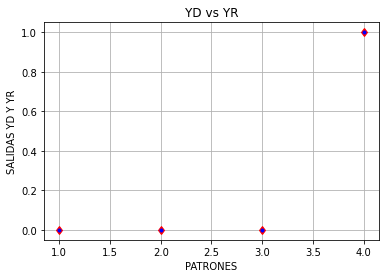

In [6]:
# NOMBRE DEL ARCHIVO DE ENTRADAS
ARCHIVO_ENTRADA = 'ENTRADAS.TXT'

# NOMBRE DEL ARCHIVO DE SALIDAS
ARCHIVO_SALIDA = 'SALIDAS.TXT'

# NOMBRE DEL ENTRENAMIENTO QUE DESEA REALIZAR
NOMBRE_DEL_ENTRENAMIENTO = 'COMPUERTA_AND'

# FUNCION DE SALIDA PARA EL ENTRENAMIENTO
FUNCION_SALIDA = 1

cfs = ConfigSimulacion(ARCHIVO_ENTRADA, ARCHIVO_SALIDA, NOMBRE_DEL_ENTRENAMIENTO, FUNCION_SALIDA)
cfs.SIMULACION()